<a href="https://www.kaggle.com/aman11381/ds-eval-cartoon?scriptVersionId=90282617" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import cupy as np # linear algebra
import cudf as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))
    print(dirname)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input
/kaggle/input/cartoon-classification
/kaggle/input/cartoon-classification/cartoon_classification
/kaggle/input/cartoon-classification/cartoon_classification/TEST
/kaggle/input/cartoon-classification/cartoon_classification/TEST/adventure_time
/kaggle/input/cartoon-classification/cartoon_classification/TEST/Tsubasa
/kaggle/input/cartoon-classification/cartoon_classification/TEST/southpark
/kaggle/input/cartoon-classification/cartoon_classification/TEST/spongebob
/kaggle/input/cartoon-classification/cartoon_classification/TEST/Gumball
/kaggle/input/cartoon-classification/cartoon_classification/TEST/smurfs
/kaggle/input/cartoon-classification/cartoon_classification/TEST/tom_and_jerry
/kaggle/input/cartoon-classification/cartoon_classification/TEST/catdog
/kaggle/input/cartoon-classification/cartoon_classification/TEST/pokemon
/kaggle/input/cartoon-classification/cartoon_classification/TEST/Familyguy
/kaggle/input/cartoon-classification/cartoon_classification/TRAIN
/kaggle/inp

## Importing the Libraries

In [2]:
import cv2
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense

## Viewing the Data

Sample Image , Image shape is:  (360, 490, 3) , type is :  <class 'numpy.ndarray'>


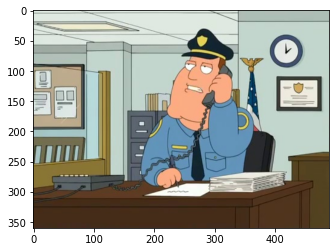

In [3]:
ad_time = '../input/cartoon-classification/cartoon_classification/TRAIN/Familyguy/family_guy1000.jpg'
ad_time = cv2.imread(ad_time)
print("Sample Image",", Image shape is: ",ad_time.shape,", type is : ",type(ad_time))
ad_time= cv2.cvtColor(ad_time, cv2.COLOR_BGR2RGB)
plt.imshow(ad_time)

In [4]:
img_width, img_height = 250, 350 #
train_data_dir = r'../input/cartoon-classification/cartoon_classification/TRAIN'
validation_data_dir = r'../input/cartoon-classification/cartoon_classification/TEST/'

In [5]:
batch_size=8

## Image Data Preprocessing

In [6]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    vertical_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

In [7]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

Found 119617 images belonging to 10 classes.
Found 18110 images belonging to 10 classes.


In [8]:
numberOfClass=10
epochs=8

## Getting VGG16 Model Layers for Transfer Learning

In [9]:
vgg = VGG16(pooling='avg', weights='imagenet', include_top=False, input_shape=(250,350,3))
vgg_layer_list = vgg.layers

2022-03-16 14:50:21.517693: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-16 14:50:21.521766: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-16 14:50:21.522490: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-16 14:50:21.523502: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

58900480/58889256 [==============================] - 0s 0us/step


## Adding Custom Layers

In [10]:
model = Sequential()
for layer in vgg_layer_list:
    model.add(layer)
    
for layer in model.layers:
    layer.trainable = False
    
    
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 250, 350, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 250, 350, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 125, 175, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 125, 175, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 125, 175, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 62, 87, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 62, 87, 256)       2

## Compiling the Model

In [11]:
model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=["accuracy"])

## Fitting the Training Data on the Model

In [12]:
hist = model.fit_generator(
        generator=train_generator,
        steps_per_epoch = 1600,
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps = 250,
        shuffle=True)

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
2022-03-16 14:50:26.600080: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/8


2022-03-16 14:50:28.364393: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


1600/1600 [==============================] - 407s 249ms/step - loss: 0.7185 - accuracy: 0.7572 - val_loss: 0.7000 - val_accuracy: 0.7620
Epoch 2/8
1600/1600 [==============================] - 393s 246ms/step - loss: 0.3669 - accuracy: 0.8765 - val_loss: 0.8539 - val_accuracy: 0.7295
Epoch 3/8
1600/1600 [==============================] - 386s 241ms/step - loss: 0.2893 - accuracy: 0.9041 - val_loss: 0.5323 - val_accuracy: 0.8335
Epoch 4/8
1600/1600 [==============================] - 376s 235ms/step - loss: 0.2510 - accuracy: 0.9163 - val_loss: 1.4177 - val_accuracy: 0.6700
Epoch 5/8
1600/1600 [==============================] - 380s 238ms/step - loss: 0.2221 - accuracy: 0.9255 - val_loss: 0.7940 - val_accuracy: 0.7595
Epoch 6/8
1600/1600 [==============================] - 375s 234ms/step - loss: 0.2149 - accuracy: 0.9298 - val_loss: 0.6417 - val_accuracy: 0.8110
Epoch 7/8
1600/1600 [==============================] - 374s 233ms/step - loss: 0.1911 - accuracy: 0.9387 - val_loss: 0.6924 - va

## Checking the Model Accuracy

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


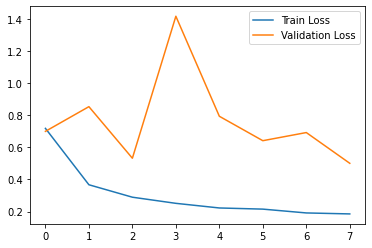

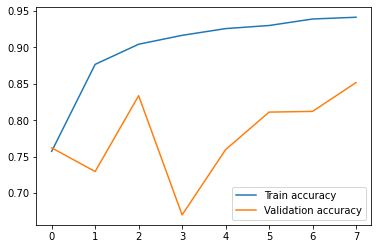

In [13]:
print(hist.history.keys())

plt.plot(hist.history["loss"], label ="Train Loss")
plt.plot(hist.history["val_loss"], label ="Validation Loss")
plt.legend()
plt.show()
plt.figure()
plt.plot(hist.history["accuracy"], label ="Train accuracy")
plt.plot(hist.history["val_accuracy"], label ="Validation accuracy")
plt.legend()
plt.show()